# Stocks and Meat Production Visualizations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

PATHNAME = "./data/"
P_VALUE = 0.05

In [2]:
meat_production_df = pd.read_csv(PATHNAME+"Meat_Stats_Meat_Production.csv")
meat_slaughter_df = pd.read_csv(PATHNAME+"Meat_Stats_Slaughter_Counts.csv")
meat_weights_df = pd.read_csv(PATHNAME+"Meat_Stats_Slaughter_Weights.csv")
stocks_df = pd.read_csv(PATHNAME+"all_stock_and_etfs.csv")
stock_descriptions_df = pd.read_csv(PATHNAME+"stock_descriptions.csv")
sugar_coffee_df = pd.read_csv(PATHNAME+"all_commodities.csv")

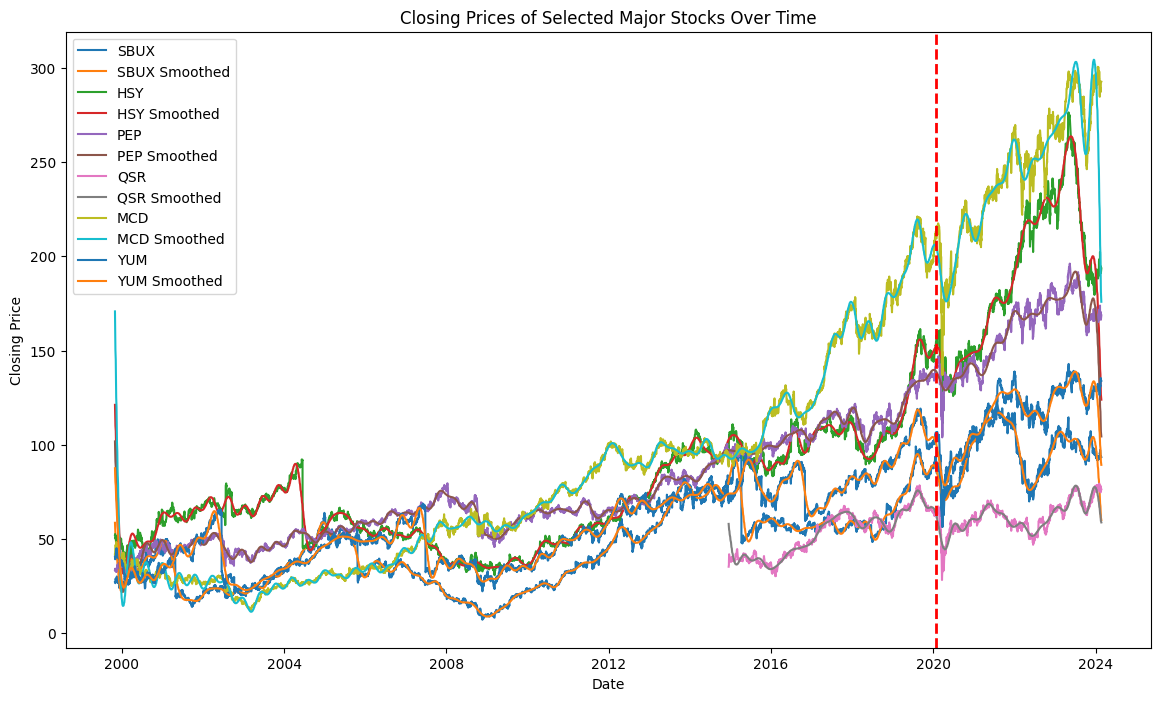

In [30]:
major_stocks = ['SBUX', 'HSY', 'PEP', "QSR", "MCD", "YUM"]  
major_stocks_df = stocks_df[stocks_df['Ticker_Symbol'].isin(major_stocks)]  
major_stocks_df['Date-Time'] = pd.to_datetime(major_stocks_df['Date-Time'])  
  
plt.figure(figsize=(14, 8))  
  
for stock in major_stocks:  
    stock_data = major_stocks_df[major_stocks_df['Ticker_Symbol'] == stock]  

    production_fft_values = np.fft.fft(stock_data['Close'])
    production_frequencies = np.fft.fftfreq(len(stock_data['Close']))
    production_fft_values[np.abs(production_frequencies) > 0.01] = 0
    smooth_production = np.fft.ifft(production_fft_values)
    
    plt.plot(stock_data['Date-Time'], stock_data['Close'], label=stock)   
    plt.plot(stock_data['Date-Time'], smooth_production, label=stock+" Smoothed")   

plt.axvline(x=pd.to_datetime(["2020-01-20"]), color='r', linestyle='--', linewidth=2)
plt.xlabel('Date')  
plt.ylabel('Closing Price')  
plt.title('Closing Prices of Selected Major Stocks Over Time')  
plt.legend()
plt.grid(False)  
plt.show()  

<Figure size 1500x1000 with 0 Axes>

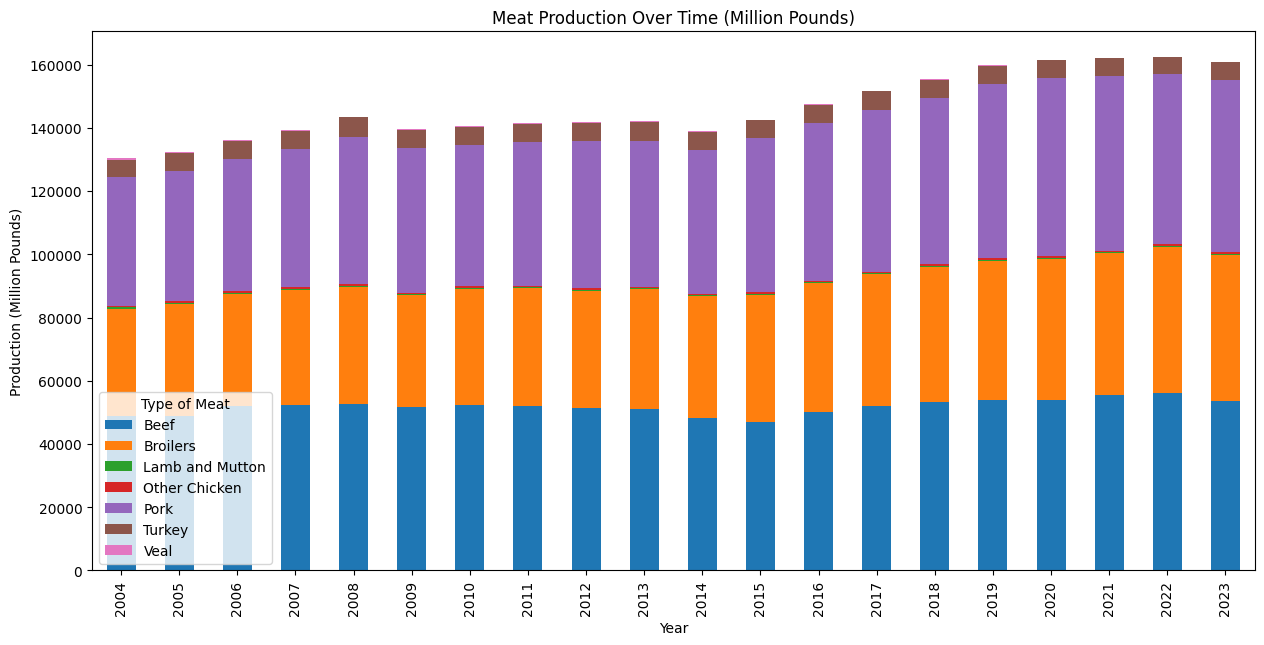

In [5]:
meat_production_df['Production'] = pd.to_numeric(meat_production_df['Production'].str.replace(',', ''), errors='coerce')  
meat_production_graph = meat_production_df[meat_production_df["Year"] >= 2004]
meat_production_graph = meat_production_graph.groupby(['Year', 'Animal'])['Production'].sum().unstack()

plt.figure(figsize=(15, 10))  
meat_production_graph.plot(kind='bar', stacked=True, figsize=(15,7))  
plt.title('Meat Production Over Time (Million Pounds)')  
plt.xlabel('Year')  
plt.ylabel('Production (Million Pounds)')  
plt.legend(title='Type of Meat')  
plt.grid(False)  
plt.show()  

# Correlation between Meat (Red Meat and Poultry) and Major Stocks' Prices

In [6]:
meat_production_df["Animal"].unique()

array(['Beef', 'Veal', 'Pork', 'Lamb and Mutton', 'Broilers',
       'Other Chicken', 'Turkey'], dtype=object)

In [7]:
meat_stocks = stock_descriptions_df[stock_descriptions_df['Description'].str.contains(
    'restaurant|fast food|meat|beef|veal|pork|lamb|mutton|broilers|chicken|turkey|burgers', case=False, regex=True)]  
meat_tickers = meat_stocks['Symbol'].tolist()  
meat_tickers

['QSR', 'CAG', 'HRL', 'DPZ', 'CMG', 'DRI', 'MCD', 'PPC', 'YUM', 'WEN']

In [8]:
meat_stocks_df = stocks_df[stocks_df['Ticker_Symbol'].isin(meat_tickers)]  
meat_stocks_df['Date-Time'] = pd.to_datetime(meat_stocks_df['Date-Time'])  
meat_stocks_df['Year'] = meat_stocks_df['Date-Time'].dt.year  
meat_stocks_df['Month'] = meat_stocks_df['Date-Time'].dt.month  
meat_stocks_df

,Date-Time,Open,High,Low,Close,Volume,Ticker_Symbol,Year,Month
0,2024-02-20,29.09,29.7100,29.0001,29.44,2673889,HRL,2024,2
1,2024-02-16,29.01,29.1700,28.7650,28.99,5655091,HRL,2024,2
2,2024-02-15,28.94,29.2210,28.8500,29.11,2380372,HRL,2024,2
3,2024-02-14,28.76,28.8254,28.5100,28.80,2690379,HRL,2024,2
4,2024-02-13,29.56,29.8000,28.6350,28.72,4173650,HRL,2024,2
...,...,...,...,...,...,...,...,...,...
157438,2004-07-19,13.80,13.8000,13.3500,13.52,966200,DPZ,2004,7
157439,2004-07-16,13.87,13.9000,13.5100,13.83,1488200,DPZ,2004,7
157440,2004-07-15,13.45,13.8500,13.3500,13.84,1276200,DPZ,2004,7
157441,2004-07-14,13.50,13.5500,12.9100,13.44,2801000,DPZ,2004,7


In [9]:
monthly_meat_stocks_df = meat_stocks_df.groupby(['Ticker_Symbol', 'Year', 'Month']).mean().reset_index()  
merged_meat_df = pd.merge(monthly_meat_stocks_df, meat_production_df, on=['Year', 'Month'], how='inner')
merged_meat_df = merged_meat_df.dropna(subset=['Close', 'Production'])
merged_meat_df

,Ticker_Symbol,Year,Month,Date-Time,Open,High,Low,Close,Volume,Date,Unit,Production,Animal,Commercial or Federally Inspected,Type of Meat
0,CAG,1999,11,1999-11-14 11:25:42.857142912,24.561429,25.040476,24.188095,24.602857,9.003333e+05,Nov-1999,Million Pounds,2144.0,Beef,Commercial,Red Meat
1,CAG,1999,11,1999-11-14 11:25:42.857142912,24.561429,25.040476,24.188095,24.602857,9.003333e+05,Nov-1999,Million Pounds,19.0,Veal,Commercial,Red Meat
2,CAG,1999,11,1999-11-14 11:25:42.857142912,24.561429,25.040476,24.188095,24.602857,9.003333e+05,Nov-1999,Million Pounds,1707.0,Pork,Commercial,Red Meat
3,CAG,1999,11,1999-11-14 11:25:42.857142912,24.561429,25.040476,24.188095,24.602857,9.003333e+05,Nov-1999,Million Pounds,22.0,Lamb and Mutton,Commercial,Red Meat
4,CAG,1999,11,1999-11-14 11:25:42.857142912,24.561429,25.040476,24.188095,24.602857,9.003333e+05,Nov-1999,Million Pounds,2111.0,Beef,Federally Inspected,Red Meat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28474,YUM,2023,12,2023-12-15 07:12:00.000000000,128.337000,129.199500,127.314500,128.408500,1.615734e+06,Dec-2023,Million Pounds,2332.4,Pork,Federally Inspected,Red Meat
28475,YUM,2023,12,2023-12-15 07:12:00.000000000,128.337000,129.199500,127.314500,128.408500,1.615734e+06,Dec-2023,Million Pounds,9.5,Lamb and Mutton,Federally Inspected,Red Meat
28476,YUM,2023,12,2023-12-15 07:12:00.000000000,128.337000,129.199500,127.314500,128.408500,1.615734e+06,Dec-2023,Million Pounds,3615.0,Broilers,Federally Inspected,Poultry
28477,YUM,2023,12,2023-12-15 07:12:00.000000000,128.337000,129.199500,127.314500,128.408500,1.615734e+06,Dec-2023,Million Pounds,41.5,Other Chicken,Federally Inspected,Poultry


In [10]:
agg_meat_df = merged_meat_df.groupby(['Ticker_Symbol', 'Year', 'Month', 'Open', 'High', 'Low', 'Close', 'Volume', 'Unit', 'Date-Time'])['Production'].sum().reset_index()
red_meat_df = merged_meat_df[merged_meat_df["Type of Meat"] == "Red Meat"].groupby(['Ticker_Symbol', 'Year', 'Month', 'Open', 'High', 'Low', 'Close', 'Volume', 'Unit', 'Date-Time'])['Production'].sum().reset_index()
poultry_df = merged_meat_df[merged_meat_df["Type of Meat"] == "Poultry"].groupby(['Ticker_Symbol', 'Year', 'Month', 'Open', 'High', 'Low', 'Close', 'Volume', 'Unit', 'Date-Time'])['Production'].sum().reset_index()

## Linear Correlation

In [11]:
correlation_results = {}  
close_cutoff_frequency = 0.01
production_cutoff_frequency = 0.15

for ticker in meat_tickers:
    stock_data = agg_meat_df[agg_meat_df['Ticker_Symbol'] == ticker]
    stock_data["Close"] = np.log(stock_data["Close"])
    stock_data["Production"] = np.log(stock_data["Production"])
    
    close_fft_values = np.fft.fft(stock_data['Close'])
    close_frequencies = np.fft.fftfreq(len(stock_data['Close']))
    close_fft_values[np.abs(close_frequencies) > close_cutoff_frequency] = 0
    smooth_close = np.fft.ifft(close_fft_values)

    production_fft_values = np.fft.fft(stock_data['Production'])
    production_frequencies = np.fft.fftfreq(len(stock_data['Production']))
    production_fft_values[np.abs(production_frequencies) > production_cutoff_frequency] = 0
    smooth_production = np.fft.ifft(production_fft_values)
    
    correlation = np.corrcoef(smooth_close, smooth_production)[0, 1]  
    correlation_results[ticker] = correlation.real

correlation_results  

{'QSR': 0.7205468027048211,
 'CAG': 0.540855851434964,
 'HRL': 0.7244364260745675,
 'DPZ': 0.7369641490569885,
 'CMG': 0.6610893607205363,
 'DRI': 0.8559879444968853,
 'MCD': 0.8397272198312549,
 'PPC': 0.27987049438061495,
 'YUM': 0.8012962802302028,
 'WEN': 0.11816918464690367}

## Granger Causality Test

### Red Meat

In [12]:
from statsmodels.tsa.stattools import grangercausalitytests

max_lag = 5
for ticker in meat_tickers:
    stock_data = red_meat_df[red_meat_df['Ticker_Symbol'] == ticker]
    stock_data["Close"] = np.log(stock_data["Close"])
    stock_data["Production"] = np.log(stock_data["Production"])

    stock_data["Close_diff"] = stock_data["Close"].diff()
    stock_data["Close_diff"] = stock_data["Close_diff"]  / stock_data["Close_diff"].abs().max() 
    stock_data["Production_diff"] = stock_data["Production"].diff()
    stock_data["Production_diff"] = stock_data["Production_diff"]  / stock_data["Production_diff"].abs().max() 
    
    stock_data.replace([np.inf, -np.inf], np.nan, inplace=True)
    stock_data.dropna(inplace=True)

    test_result = grangercausalitytests(stock_data[['Close_diff', 'Production_diff']], max_lag, verbose=False)
    for lag in range(1, max_lag+1):
        for test, result in test_result[lag][0].items():
            p_value = result[1]
            if p_value < P_VALUE:
                print(ticker+f' at Lag {lag}:')
                print(f'Test: {test}, p-value: {p_value}')
                print(f'Result: Reject the null hypothesis, there is Granger causality.')

CAG at Lag 1:
Test: ssr_ftest, p-value: 0.03412253101936457
Result: Reject the null hypothesis, there is Granger causality.
CAG at Lag 1:
Test: ssr_chi2test, p-value: 0.0323512110748361
Result: Reject the null hypothesis, there is Granger causality.
CAG at Lag 1:
Test: lrtest, p-value: 0.033039024718294195
Result: Reject the null hypothesis, there is Granger causality.
CAG at Lag 1:
Test: params_ftest, p-value: 0.03412253101936271
Result: Reject the null hypothesis, there is Granger causality.
HRL at Lag 1:
Test: ssr_ftest, p-value: 0.01772277436541694
Result: Reject the null hypothesis, there is Granger causality.
HRL at Lag 1:
Test: ssr_chi2test, p-value: 0.016496806251006198
Result: Reject the null hypothesis, there is Granger causality.
HRL at Lag 1:
Test: lrtest, p-value: 0.017037550986172552
Result: Reject the null hypothesis, there is Granger causality.
HRL at Lag 1:
Test: params_ftest, p-value: 0.01772277436541627
Result: Reject the null hypothesis, there is Granger causality.


### Poultry

In [13]:
from statsmodels.tsa.stattools import grangercausalitytests

max_lag = 5
for ticker in meat_tickers:
    stock_data = poultry_df[poultry_df['Ticker_Symbol'] == ticker]
    stock_data["Close"] = np.log(stock_data["Close"])
    stock_data["Production"] = np.log(stock_data["Production"])

    stock_data["Close_diff"] = stock_data["Close"].diff()
    stock_data["Close_diff"] = stock_data["Close_diff"]  / stock_data["Close_diff"].abs().max() 
    stock_data["Production_diff"] = stock_data["Production"].diff()
    stock_data["Production_diff"] = stock_data["Production_diff"]  / stock_data["Production_diff"].abs().max() 
    
    stock_data.replace([np.inf, -np.inf], np.nan, inplace=True)
    stock_data.dropna(inplace=True)

    test_result = grangercausalitytests(stock_data[['Close_diff', 'Production_diff']], max_lag, verbose=False)
    for lag in range(1, max_lag+1):
        for test, result in test_result[lag][0].items():
            p_value = result[1]
            if p_value < P_VALUE:
                print(ticker+f' at Lag {lag}:')
                print(f'Test: {test}, p-value: {p_value}')
                print(f'Result: Reject the null hypothesis, there is Granger causality.')

CAG at Lag 1:
Test: ssr_ftest, p-value: 0.04493084554362377
Result: Reject the null hypothesis, there is Granger causality.
CAG at Lag 1:
Test: ssr_chi2test, p-value: 0.04289353213806876
Result: Reject the null hypothesis, there is Granger causality.
CAG at Lag 1:
Test: lrtest, p-value: 0.0436334740871532
Result: Reject the null hypothesis, there is Granger causality.
CAG at Lag 1:
Test: params_ftest, p-value: 0.04493084554362377
Result: Reject the null hypothesis, there is Granger causality.
HRL at Lag 1:
Test: ssr_ftest, p-value: 0.04438276529958945
Result: Reject the null hypothesis, there is Granger causality.
HRL at Lag 1:
Test: ssr_chi2test, p-value: 0.042357691283163384
Result: Reject the null hypothesis, there is Granger causality.
HRL at Lag 1:
Test: lrtest, p-value: 0.04309553781776367
Result: Reject the null hypothesis, there is Granger causality.
HRL at Lag 1:
Test: params_ftest, p-value: 0.04438276529958945
Result: Reject the null hypothesis, there is Granger causality.
HR

## Johansen Test

In [14]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def johansen_test(data, ticker, det_order, k_ar_diff):
    result = coint_johansen(data, det_order, k_ar_diff)
    print('Eigenvalues:', result.lr1)
    print('Critical values (90%, 95%, 99%):', result.cvt)
    for i, eigenvalue in enumerate(result.lr1):
        if eigenvalue > result.cvt[i, 1]:  # 95% critical value
            print(ticker+f" test statistic {eigenvalue} exceeds the 95% critical value {result.cvt[i, 1]}")
            print(f"Series are cointegrated with {i+1} cointegrating relations at the 95% significance level")
        # else:
        #     print(f"Test statistic {eigenvalue} does not exceed the 95% critical value {result.cvt[i, 1]}")
        #     print("Series are not cointegrated at the 95% significance level")

### Red Meat

In [15]:
for ticker in meat_tickers:
    stock_data = red_meat_df[poultry_df['Ticker_Symbol'] == ticker]
    stock_data["Close"] = np.log(stock_data["Close"])
    stock_data["Production"] = np.log(stock_data["Production"])
    
    johansen_test(stock_data[['Close', 'Production']], ticker, det_order=0, k_ar_diff=1)

Eigenvalues: [31.43766523  3.85323847]
Critical values (90%, 95%, 99%): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
QSR test statistic 31.437665227592717 exceeds the 95% critical value 15.4943
Series are cointegrated with 1 cointegrating relations at the 95% significance level
QSR test statistic 3.853238474220374 exceeds the 95% critical value 3.8415
Series are cointegrated with 2 cointegrating relations at the 95% significance level
Eigenvalues: [32.42323693  5.96987215]
Critical values (90%, 95%, 99%): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
CAG test statistic 32.42323693490401 exceeds the 95% critical value 15.4943
Series are cointegrated with 1 cointegrating relations at the 95% significance level
CAG test statistic 5.969872149299667 exceeds the 95% critical value 3.8415
Series are cointegrated with 2 cointegrating relations at the 95% significance level
Eigenvalues: [38.05626252  7.61280142]
Critical values (90%, 95%, 99%): [[13.4294 15.4943 19.9349]
 [ 2

### Poultry

In [16]:
for ticker in meat_tickers:
    stock_data = poultry_df[poultry_df['Ticker_Symbol'] == ticker]
    stock_data["Close"] = np.log(stock_data["Close"])
    stock_data["Production"] = np.log(stock_data["Production"])
    
    johansen_test(stock_data[['Close', 'Production']], ticker, det_order=0, k_ar_diff=1)

Eigenvalues: [25.9160328   3.94432744]
Critical values (90%, 95%, 99%): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
QSR test statistic 25.91603280107308 exceeds the 95% critical value 15.4943
Series are cointegrated with 1 cointegrating relations at the 95% significance level
QSR test statistic 3.9443274445109044 exceeds the 95% critical value 3.8415
Series are cointegrated with 2 cointegrating relations at the 95% significance level
Eigenvalues: [21.84434915  5.07706661]
Critical values (90%, 95%, 99%): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
CAG test statistic 21.844349153023753 exceeds the 95% critical value 15.4943
Series are cointegrated with 1 cointegrating relations at the 95% significance level
CAG test statistic 5.077066610409321 exceeds the 95% critical value 3.8415
Series are cointegrated with 2 cointegrating relations at the 95% significance level
Eigenvalues: [34.92862697  4.21433236]
Critical values (90%, 95%, 99%): [[13.4294 15.4943 19.9349]
 [ 

# Sugar and Coffee Visualizations

In [17]:
sugar_coffee_df['Date-Time'] = pd.to_datetime(sugar_coffee_df['Date-Time'])
sugar_coffee_df['Year'] = sugar_coffee_df['Date-Time'].dt.year
sugar_coffee_df['Month'] = sugar_coffee_df['Date-Time'].dt.month
sugar_coffee_df

,Date-Time,Value,Unit,Commodity,Year,Month
0,2024-01-01,203.879130,Cents per Pound,Coffee,2024,1
1,2023-12-01,210.310476,Cents per Pound,Coffee,2023,12
2,2023-11-01,197.433182,Cents per Pound,Coffee,2023,11
3,2023-10-01,183.951364,Cents per Pound,Coffee,2023,10
4,2023-09-01,183.589048,Cents per Pound,Coffee,2023,9
...,...,...,...,...,...,...
1222,1990-05-01,14.619999,Cents per Pound,Sugar,1990,5
1223,1990-04-01,15.240002,Cents per Pound,Sugar,1990,4
1224,1990-03-01,15.310001,Cents per Pound,Sugar,1990,3
1225,1990-02-01,14.650002,Cents per Pound,Sugar,1990,2


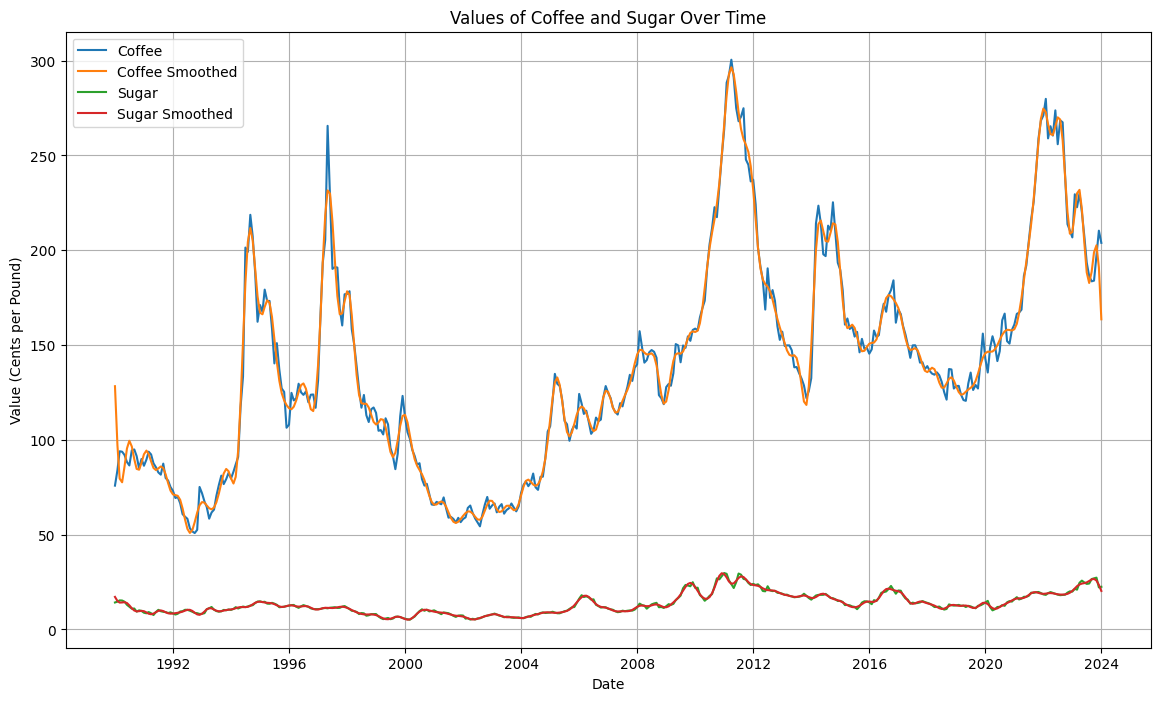

In [18]:
sugar_coffee_df['Date-Time'] = pd.to_datetime(sugar_coffee_df['Date-Time'])  
commodities = ["Coffee", "Sugar"] # corn is an invalid commodity

plt.figure(figsize=(14, 8))  

sugar_coffee_cutoff_frequency = 0.15

for commodity in commodities:  
    commodity_data = sugar_coffee_df[sugar_coffee_df['Commodity'] == commodity]  
    
    sugar_coffee_fft_values = np.fft.fft(commodity_data['Value'])
    sugar_coffee_frequencies = np.fft.fftfreq(len(commodity_data['Value']))
    sugar_coffee_fft_values[np.abs(sugar_coffee_frequencies) > sugar_coffee_cutoff_frequency] = 0
    smooth_commodity_data = np.fft.ifft(sugar_coffee_fft_values)
    
    plt.plot(commodity_data['Date-Time'], commodity_data['Value'], label=commodity)  
    plt.plot(commodity_data['Date-Time'], smooth_commodity_data, label=commodity+" Smoothed")  
    
  
plt.xlabel('Date')  
plt.ylabel('Value (Cents per Pound)')  
plt.title('Values of Coffee and Sugar Over Time')  
plt.legend()
plt.grid(True)  
plt.show()  

# Correlation between Coffee and Sugar and Major Stocks' Prices

In [19]:
sugar_coffee_stocks = stock_descriptions_df[stock_descriptions_df['Description'].str.contains(
    'coffee|drink|sugar|beverage', case=False, regex=True)]
sugar_coffee_tickers = sugar_coffee_stocks['Symbol'].tolist()  
sugar_coffee_tickers

['SBUX', 'HSY', 'ADM', 'KDP', 'PEP', 'MNST', 'COKE']

In [20]:
sugar_coffee_stocks_df = stocks_df[stocks_df['Ticker_Symbol'].isin(sugar_coffee_tickers)]  
sugar_coffee_stocks_df['Date-Time'] = pd.to_datetime(sugar_coffee_stocks_df['Date-Time'])  
sugar_coffee_stocks_df['Year'] = sugar_coffee_stocks_df['Date-Time'].dt.year  
sugar_coffee_stocks_df['Month'] = sugar_coffee_stocks_df['Date-Time'].dt.month  
sugar_coffee_stocks_df

,Date-Time,Open,High,Low,Close,Volume,Ticker_Symbol,Year,Month
9501,2024-02-20,53.52,53.85,52.74,53.40,4459613,ADM,2024,2
9502,2024-02-16,54.30,54.52,53.36,53.65,3302726,ADM,2024,2
9503,2024-02-15,53.26,54.73,53.25,54.31,3826429,ADM,2024,2
9504,2024-02-14,52.55,53.32,52.45,53.27,3746378,ADM,2024,2
9505,2024-02-13,53.50,54.17,52.47,52.47,5274417,ADM,2024,2
...,...,...,...,...,...,...,...,...,...
94858,1999-11-05,51.31,52.00,50.63,50.69,8200,COKE,1999,11
94859,1999-11-04,51.00,52.00,50.88,51.00,2900,COKE,1999,11
94860,1999-11-03,52.00,52.00,50.63,52.00,2700,COKE,1999,11
94861,1999-11-02,53.06,53.06,51.75,52.00,5600,COKE,1999,11


In [21]:
monthly_sugar_coffee_stocks_df = sugar_coffee_stocks_df.groupby(['Ticker_Symbol', 'Year', 'Month']).mean().reset_index()  
merged_sugar_coffee_df = pd.merge(monthly_sugar_coffee_stocks_df, sugar_coffee_df, on=['Year', 'Month'], how='inner')
merged_sugar_coffee_df = merged_sugar_coffee_df.dropna(subset=['Close', 'Value'])
merged_sugar_coffee_df

,Ticker_Symbol,Year,Month,Date-Time_x,Open,High,Low,Close,Volume,Date-Time_y,Value,Unit,Commodity
0,ADM,1999,11,1999-11-14 11:25:42.857142912,12.496667,12.690000,12.289524,12.525238,1.471619e+06,1999-11-01,112.450909,Cents per Pound,Coffee
1,ADM,1999,11,1999-11-14 11:25:42.857142912,12.496667,12.690000,12.289524,12.525238,1.471619e+06,1999-11-01,85.409341,NaN,NaN
2,ADM,1999,11,1999-11-14 11:25:42.857142912,12.496667,12.690000,12.289524,12.525238,1.471619e+06,1999-11-01,6.505000,Cents per Pound,Sugar
3,ADM,1999,12,1999-12-16 00:00:00.000000000,12.376364,12.612727,12.232273,12.385909,1.575786e+06,1999-12-01,123.165217,Cents per Pound,Coffee
4,ADM,1999,12,1999-12-16 00:00:00.000000000,12.376364,12.612727,12.232273,12.385909,1.575786e+06,1999-12-01,87.222838,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4360,SBUX,2023,12,2023-12-15 07:12:00.000000000,96.859500,97.397085,95.919615,96.694000,8.298476e+06,2023-12-01,207.397969,NaN,NaN
4361,SBUX,2023,12,2023-12-15 07:12:00.000000000,96.859500,97.397085,95.919615,96.694000,8.298476e+06,2023-12-01,22.145714,Cents per Pound,Sugar
4362,SBUX,2024,1,2024-01-16 09:08:34.285714176,93.348571,93.964048,92.411981,93.057619,9.472578e+06,2024-01-01,203.879130,Cents per Pound,Coffee
4363,SBUX,2024,1,2024-01-16 09:08:34.285714176,93.348571,93.964048,92.411981,93.057619,9.472578e+06,2024-01-01,198.757928,Dollar per Metric Ton,Corn


In [22]:
merged_coffee_df = merged_sugar_coffee_df[merged_sugar_coffee_df['Commodity'] == "Coffee"]
merged_sugar_df = merged_sugar_coffee_df[merged_sugar_coffee_df['Commodity'] == "Sugar"]

## Linear Correlation

### Coffee

In [23]:
correlation_results = {}  
close_cutoff_frequency = 0.01

for ticker in sugar_coffee_tickers:
    stock_data = merged_coffee_df[merged_coffee_df['Ticker_Symbol'] == ticker]
    stock_data["Close"] = np.log(stock_data["Close"])
    stock_data["Value"] = np.log(stock_data["Value"])

    if len(stock_data) > 0:
        close_fft_values = np.fft.fft(stock_data['Close'])
        close_frequencies = np.fft.fftfreq(len(stock_data['Close']))
        close_fft_values[np.abs(close_frequencies) > close_cutoff_frequency] = 0
        smooth_close = np.fft.ifft(close_fft_values)
    
        value_fft_values = np.fft.fft(stock_data['Value'])
        value_frequencies = np.fft.fftfreq(len(stock_data['Value']))
        value_fft_values[np.abs(value_frequencies) > sugar_coffee_cutoff_frequency] = 0
        smooth_value = np.fft.ifft(value_fft_values)
        
        correlation = np.corrcoef(smooth_close, smooth_value)[0, 1]  
        correlation_results[ticker] = correlation.real

correlation_results  

{'SBUX': 0.32851147990307,
 'HSY': 0.21810490205174415,
 'ADM': 0.6996972700406716,
 'PEP': 0.5445824409889911,
 'COKE': 0.3778236711346963}

### Sugar

In [24]:
correlation_results = {}  

for ticker in sugar_coffee_tickers:
    stock_data = merged_sugar_df[merged_sugar_df['Ticker_Symbol'] == ticker]
    stock_data["Close"] = np.log(stock_data["Close"])
    stock_data["Value"] = np.log(stock_data["Value"])

    if len(stock_data) > 0:
        close_fft_values = np.fft.fft(stock_data['Close'])
        close_frequencies = np.fft.fftfreq(len(stock_data['Close']))
        close_fft_values[np.abs(close_frequencies) > close_cutoff_frequency] = 0
        smooth_close = np.fft.ifft(close_fft_values)
    
        value_fft_values = np.fft.fft(stock_data['Value'])
        value_frequencies = np.fft.fftfreq(len(stock_data['Value']))
        value_fft_values[np.abs(value_frequencies) > sugar_coffee_cutoff_frequency] = 0
        smooth_value = np.fft.ifft(value_fft_values)
        
        correlation = np.corrcoef(smooth_close, smooth_value)[0, 1]  
        correlation_results[ticker] = correlation.real

correlation_results  

{'SBUX': 0.2344102375985186,
 'HSY': 0.11350327382263382,
 'ADM': 0.588690240889873,
 'PEP': 0.41750141861131357,
 'COKE': 0.24539057461425778}

## Granger Causality Test

### Coffee

In [25]:
max_lag = 5
for ticker in sugar_coffee_tickers:
    stock_data = merged_coffee_df[merged_coffee_df['Ticker_Symbol'] == ticker]
    stock_data["Close"] = np.log(stock_data["Close"])
    stock_data["Value"] = np.log(stock_data["Value"])

    stock_data["Close_diff"] = stock_data["Close"].diff()
    stock_data["Close_diff"] = stock_data["Close_diff"]  / stock_data["Close_diff"].abs().max() 
    stock_data["Value_diff"] = stock_data["Value"].diff()
    stock_data["Value_diff"] = stock_data["Value_diff"]  / stock_data["Value_diff"].abs().max() 
    
    stock_data.replace([np.inf, -np.inf], np.nan, inplace=True)
    stock_data.dropna(inplace=True)

    if len(stock_data) > 5:
        test_result = grangercausalitytests(stock_data[['Close_diff', 'Value_diff']], max_lag, verbose=False)
        for lag in range(1, max_lag+1):
            for test, result in test_result[lag][0].items():
                p_value = result[1]
                if p_value < P_VALUE:
                    print(ticker+f' at Lag {lag}:')
                    print(f'Test: {test}, p-value: {p_value}')
                    print(f'Result: Reject the null hypothesis, there is Granger causality.')

PEP at Lag 1:
Test: ssr_ftest, p-value: 0.038972719635229094
Result: Reject the null hypothesis, there is Granger causality.
PEP at Lag 1:
Test: ssr_chi2test, p-value: 0.037081753051550544
Result: Reject the null hypothesis, there is Granger causality.
PEP at Lag 1:
Test: lrtest, p-value: 0.03779354784479859
Result: Reject the null hypothesis, there is Granger causality.
PEP at Lag 1:
Test: params_ftest, p-value: 0.038972719635229094
Result: Reject the null hypothesis, there is Granger causality.
PEP at Lag 2:
Test: ssr_ftest, p-value: 0.047563532162158355
Result: Reject the null hypothesis, there is Granger causality.
PEP at Lag 2:
Test: ssr_chi2test, p-value: 0.043582586028493596
Result: Reject the null hypothesis, there is Granger causality.
PEP at Lag 2:
Test: lrtest, p-value: 0.04507174609787686
Result: Reject the null hypothesis, there is Granger causality.
PEP at Lag 2:
Test: params_ftest, p-value: 0.0475635321621609
Result: Reject the null hypothesis, there is Granger causality

### Sugar

In [26]:
max_lag = 5
for ticker in sugar_coffee_tickers:
    stock_data = merged_sugar_df[merged_sugar_df['Ticker_Symbol'] == ticker]
    stock_data["Close"] = np.log(stock_data["Close"])
    stock_data["Value"] = np.log(stock_data["Value"])

    stock_data["Close_diff"] = stock_data["Close"].diff()
    stock_data["Close_diff"] = stock_data["Close_diff"]  / stock_data["Close_diff"].abs().max() 
    stock_data["Value_diff"] = stock_data["Value"].diff()
    stock_data["Value_diff"] = stock_data["Value_diff"]  / stock_data["Value_diff"].abs().max() 
    
    stock_data.replace([np.inf, -np.inf], np.nan, inplace=True)
    stock_data.dropna(inplace=True)

    if len(stock_data) > 5:
        test_result = grangercausalitytests(stock_data[['Close_diff', 'Value_diff']], max_lag, verbose=False)
        for lag in range(1, max_lag+1):
            for test, result in test_result[lag][0].items():
                p_value = result[1]
                if p_value < P_VALUE:
                    print(ticker+f' at Lag {lag}:')
                    print(f'Test: {test}, p-value: {p_value}')
                    print(f'Result: Reject the null hypothesis, there is Granger causality.')

## Johansen Test

### Coffee

In [27]:
for ticker in sugar_coffee_tickers:
    stock_data = merged_coffee_df[merged_coffee_df['Ticker_Symbol'] == ticker]
    stock_data["Close"] = np.log(stock_data["Close"])
    stock_data["Value"] = np.log(stock_data["Value"])
    
    if len(stock_data) > 5:
        johansen_test(stock_data[['Close', 'Value']], ticker, det_order=0, k_ar_diff=1)

Eigenvalues: [5.72903576 1.08802915]
Critical values (90%, 95%, 99%): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Eigenvalues: [3.69748698 0.40743673]
Critical values (90%, 95%, 99%): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Eigenvalues: [15.12656721  1.41997875]
Critical values (90%, 95%, 99%): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Eigenvalues: [5.64812038 0.42220927]
Critical values (90%, 95%, 99%): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Eigenvalues: [3.63658561 0.70780871]
Critical values (90%, 95%, 99%): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]


### Sugar

In [28]:
for ticker in sugar_coffee_tickers:
    stock_data = merged_sugar_df[merged_sugar_df['Ticker_Symbol'] == ticker]
    stock_data["Close"] = np.log(stock_data["Close"])
    stock_data["Value"] = np.log(stock_data["Value"])
    
    if len(stock_data) > 5:
        johansen_test(stock_data[['Close', 'Value']], ticker, det_order=0, k_ar_diff=1)

Eigenvalues: [8.39145189 2.48756263]
Critical values (90%, 95%, 99%): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Eigenvalues: [7.52369461 0.69779539]
Critical values (90%, 95%, 99%): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Eigenvalues: [11.89263024  2.90677015]
Critical values (90%, 95%, 99%): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Eigenvalues: [7.09449013 0.77906022]
Critical values (90%, 95%, 99%): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Eigenvalues: [7.47736323 0.71142644]
Critical values (90%, 95%, 99%): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]


## IRF

### Coffee

In [50]:
from statsmodels.tsa.api import VAR

for ticker in sugar_coffee_tickers:
    stock_data = merged_sugar_df[merged_sugar_df['Ticker_Symbol'] == ticker]
    stock_data["Close"] = np.log(stock_data["Close"])
    stock_data["Value"] = np.log(stock_data["Value"])
    
    stock_data["Close_diff"] = stock_data["Close"].diff()
    stock_data["Close_diff"] = stock_data["Close_diff"]  / stock_data["Close_diff"].abs().max() 
    stock_data["Value_diff"] = stock_data["Value"].diff()
    stock_data["Value_diff"] = stock_data["Value_diff"]  / stock_data["Value_diff"].abs().max() 

    stock_data = stock_data.dropna()
    
    if len(stock_data) > 5:
        VAR_model = VAR(stock_data[["Close_diff", "Value_diff"]])
        results = model.fit(maxlags=1, ic='aic')
        irf = results.irf(10)
        print(results.summary())
        # irf.plot(orth=False)
        # plt.show()


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 04, Aug, 2024
Time:                     02:54:48
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -62.7638
Nobs:                     5.00000    HQIC:                  -63.5530
Log likelihood:           147.548    FPE:                1.28048e-27
AIC:                     -62.2951    Det(Omega_mle):     5.00189e-28
--------------------------------------------------------------------
Results for equation MeatProduction
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                    -0.003841         0.000203          -18.926           0.000
L1.MeatProduction         0.710355         0.003050          232.910           0.000
L1.StockValue             0.474467 

C:\Users\sozhu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sozhu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sozhu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sozhu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCac

### Sugar

   MeatProduction  StockValue
1        0.095310    0.048790
2        0.087011    0.046520
3        0.080043    0.044452
4        0.074108    0.042560
5        0.068993    0.040822
6        0.064539    0.039221


C:\Users\sozhu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


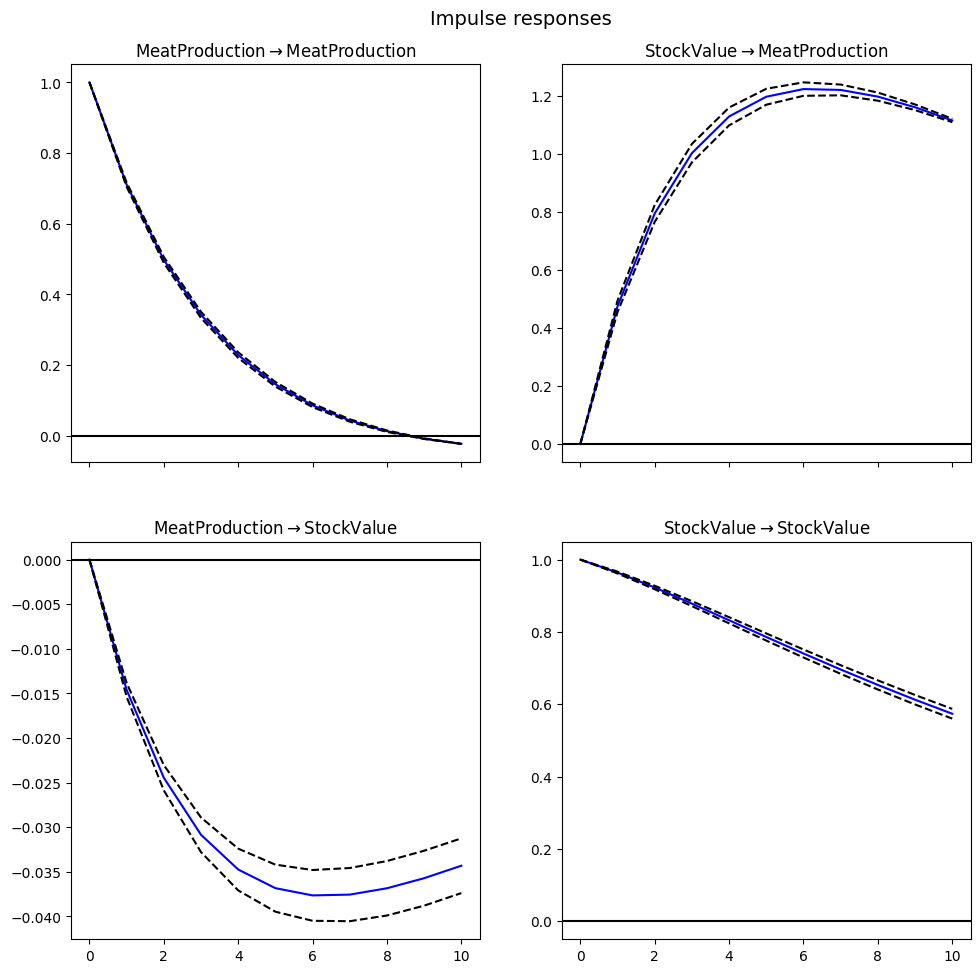

In [36]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR

# Sample data (replace this with your actual data)
meat_production = pd.Series([100, 110, 120, 130, 140, 150, 160], name='MeatProduction')
stock_value = pd.Series([200, 210, 220, 230, 240, 250, 260], name='StockValue')

# Convert to DataFrame
data = pd.concat([meat_production, stock_value], axis=1)

# Log transform the data to stabilize variance
data_log = np.log(data)

# Differencing to remove trends
data_diff = data_log.diff().dropna()

print(data_diff)

# Fit the VAR model
model = VAR(data_diff)
results = model.fit(maxlags=1, ic='aic')

# Impulse Response Function
irf = results.irf(10)  # Number of periods for the IRF

# Plot the IRF
irf.plot(orth=False)
plt.show()
